In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
plt.style.use('Solarize_Light2')
from astropy import units as u
import astropy.coordinates as coord
from mpl_toolkits import mplot3d
from sklearn.datasets import make_blobs
import seaborn as sns
import hdbscan
import math
import itertools
import pickle


mpl.rcParams['figure.dpi'] = 150

In [3]:
blobs, labels = make_blobs(n_samples=2000, n_features=10) # 10 features
pd.DataFrame(blobs).head() # show the first 5 rows

clusterer = hdbscan.HDBSCAN()

def healpix(sourceID, level):
    pixel = math.floor(sourceID /(2**35 * 4**(12-level)))
    return pixel

def parallax(mas):
    arcsec = mas/1000
    return 1/arcsec


parallax(1.1)

healpix(3094113406614578432, 5)

5496

In [4]:
# Load the data
coindata = pd.read_csv('Data\\COIN-result.csv')
plataisdata = pd.read_csv('Data\\Platais-result.csv')
UBC14data = pd.read_csv('Data\\UBC14-result.csv')
UBC13data = pd.read_csv('Data\\UBC13-result.csv')
UBC21data = pd.read_csv('Data\\UBC21-result.csv')
UPK495data = pd.read_csv('Data\\UPK_495-result.csv')
UPK533data = pd.read_csv('Data\\UPK_533-result.csv')
UPK654data = pd.read_csv('Data\\UPK_654-result.csv')



#data for the crossmatch
members = pd.read_csv('Data\\members_kept_2681_OCs.csv')


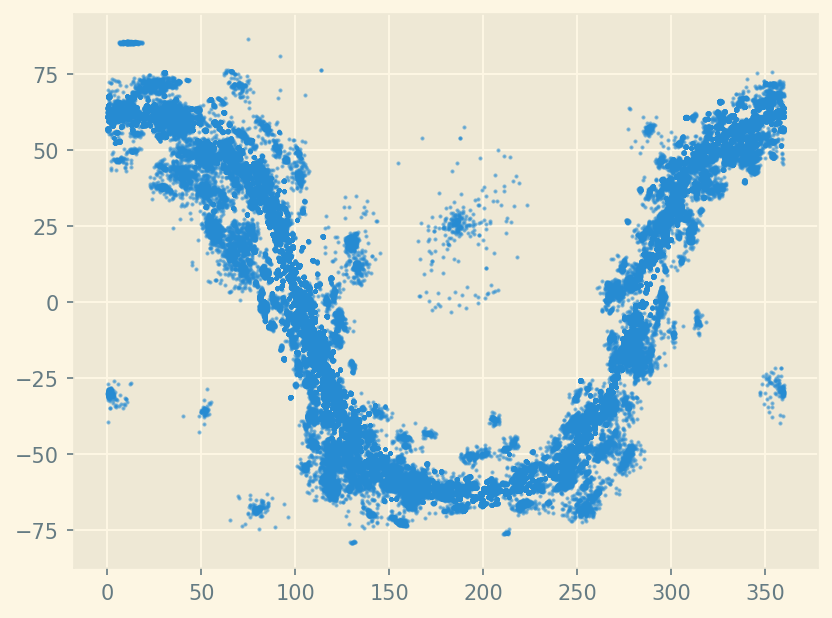

In [5]:
plt.scatter(members['ra'], members['dec'],marker= 'o', s=1, alpha=0.5)
plt.show()

clusters = members['cluster'].unique()


Now insert the functions that will be used to cluster the data


In [6]:



def HDBSCAN(data, minsize, magnitudecut):
    data = data[data['phot_g_mean_mag'] <= magnitudecut]
    data_needed = data[['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'source_id']].dropna()
    HDBprep = data_needed[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
    clusterer = hdbscan.HDBSCAN(min_cluster_size=minsize, cluster_selection_method='leaf', min_samples=10).fit(HDBprep)
    data_needed['clusternumber'] = clusterer.labels_
    clusteramount = clusterer.labels_.max() + 1
    print(f'HDBScan found {clusteramount} clusters at magnitudecut {magnitudecut}.')
    return data_needed, clusterer

Now we Run the clusterer and save it as to not spend an hour clustering each time, clusterer has been run so hashtag the code and instead import from the files.


In [7]:
#create dictionaries
UBC21_dictionary = {}
UBC21_cluster_dict = {}


UBC21members = members.query('cluster == "UBC_21"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC21members['phot_g_mean_mag'])) + 1))

for i in magnitudecuts:
    clustersize = min(10, len(UBC21members.query(f'phot_g_mean_mag<= {i}')))
    UBC21_dictionary[f'UBC21_mag{i}_needed'], UBC21_cluster_dict[f'UBC21_mag{i}_clusterer'] = HDBSCAN(UBC21data, clustersize, i)


#save the dictionaries as csv files 
for key in UBC21_dictionary.keys():
    UBC21_dictionary[key].to_csv(f'Data\\UBC21\\needed\\{key}.csv', index=False)
for key in UBC21_cluster_dict.keys():
    with open(f'Data\\UBC21\\clusterer\\{key}.pkl', 'wb') as f:
        pickle.dump(UBC21_cluster_dict[key], f)


#way to load the clustering dictionaries, the csv files can be recovered the usual way

# for i in magnitudecuts:
#     with open(f'Data\\UBC21\\clusterer\\UBC21_mag{i}_clusterer.pkl', 'rb') as f:
#         UBC21_cluster_dict[f'UBC21_mag{i}_clusterer'] = pickle.load(f)

# for i in magnitudecuts:
#     UBC21_dictionary[f'UBC21_mag{i}_needed'] = pd.read_csv(f'Data\\UBC21\\needed\\UBC21_mag{i}_needed.csv')

HDBScan found 69 clusters at magnitudecut 12.0.
HDBScan found 18 clusters at magnitudecut 13.0.
HDBScan found 25 clusters at magnitudecut 14.0.
HDBScan found 74 clusters at magnitudecut 15.0.
HDBScan found 176 clusters at magnitudecut 16.0.
HDBScan found 357 clusters at magnitudecut 17.0.


In [8]:
#create dictionaries
UBC13_dictionary = {}
UBC13_cluster_dict = {}
UBC13members = members.query('cluster == "UBC_13"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC13members['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(UBC13members.query(f'phot_g_mean_mag <= {i}')))
#     UBC13_dictionary[f'UBC13_mag{i}_needed'], UBC13_cluster_dict[f'UBC13_mag{i}_clusterer'] = HDBSCAN(UBC13data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UBC13_dictionary.keys():
#     UBC13_dictionary[key].to_csv(f'Data\\UBC13\\needed\\{key}.csv', index=False)
# for key in UBC13_cluster_dict.keys():
#     with open(f'Data\\UBC13\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UBC13_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\UBC13\\clusterer\\UBC13_mag{i}_clusterer.pkl', 'rb') as f:
        UBC13_cluster_dict[f'UBC13_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UBC13_dictionary[f'UBC13_mag{i}_needed'] = pd.read_csv(f'Data\\UBC13\\needed\\UBC13_mag{i}_needed.csv')

In [9]:
#create dictionaries
UBC14_dictionary = {}
UBC14_cluster_dict = {}
UBC14members = members.query('cluster == "UBC_14"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC14members['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(UBC14members.query(f'phot_g_mean_mag <= {i}')))
#     UBC14_dictionary[f'UBC14_mag{i}_needed'], UBC14_cluster_dict[f'UBC14_mag{i}_clusterer'] = HDBSCAN(UBC14data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UBC14_dictionary.keys():
#     UBC14_dictionary[key].to_csv(f'Data\\UBC14\\needed\\{key}.csv', index=False)
# for key in UBC14_cluster_dict.keys():
#     with open(f'Data\\UBC14\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UBC14_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\UBC14\\clusterer\\UBC14_mag{i}_clusterer.pkl', 'rb') as f:
        UBC14_cluster_dict[f'UBC14_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UBC14_dictionary[f'UBC14_mag{i}_needed'] = pd.read_csv(f'Data\\UBC14\\needed\\UBC14_mag{i}_needed.csv')

In [10]:
#create dictionaries
coin_dictionary = {}
coin_cluster_dict = {}
coinmembers = members.query('cluster == "COIN-Gaia_13"')
magnitudecuts = np.arange(12, (np.ceil(np.max(coinmembers['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(coinmembers.query(f'phot_g_mean_mag <= {i}')))
#     coin_dictionary[f'coin_mag{i}_needed'], coin_cluster_dict[f'coin_mag{i}_clusterer'] = HDBSCAN(coindata, clustersize, i)

# #save the dictionaries as csv files 
# for key in coin_dictionary.keys():
#     coin_dictionary[key].to_csv(f'Data\\COIN\\needed\\{key}.csv', index=False)
# for key in coin_cluster_dict.keys():
#     with open(f'Data\\COIN\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(coin_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\COIN\\clusterer\\coin_mag{i}_clusterer.pkl', 'rb') as f:
        coin_cluster_dict[f'coin_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    coin_dictionary[f'coin_mag{i}_needed'] = pd.read_csv(f'Data\\COIN\\needed\\coin_mag{i}_needed.csv')


In [11]:
#create dictionaries
platais_dictionary = {}
platais_cluster_dict = {}

plataismembers = members.query('cluster == "Platais_10"')
magnitudecuts = np.arange(12, (np.ceil(np.max(plataismembers['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(plataismembers.query(f'phot_g_mean_mag <= {i}')))
#     platais_dictionary[f'platais_mag{i}_needed'], platais_cluster_dict[f'platais_mag{i}_clusterer'] = HDBSCAN(plataisdata, clustersize, i)

# #save the dictionaries as csv files 
# for key in platais_dictionary.keys():
#     platais_dictionary[key].to_csv(f'Data\\Platais10\\needed\\{key}.csv', index=False)
# for key in platais_cluster_dict.keys():
#     with open(f'Data\\Platais10\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(platais_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\Platais10\\clusterer\\platais_mag{i}_clusterer.pkl', 'rb') as f:
        platais_cluster_dict[f'platais_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    platais_dictionary[f'platais_mag{i}_needed'] = pd.read_csv(f'Data\\Platais10\\needed\\platais_mag{i}_needed.csv')

In [12]:
#create dictionaries
UPK495_dictionary = {}
UPK495_cluster_dict = {}
UPK495members = members.query('cluster == "UPK_495"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UPK495members['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(UPK495members.query(f'phot_g_mean_mag <= {i}')))
#     UPK495_dictionary[f'UPK495_mag{i}_needed'], UPK495_cluster_dict[f'UPK495_mag{i}_clusterer'] = HDBSCAN(UPK495data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UPK495_dictionary.keys():
#     UPK495_dictionary[key].to_csv(f'Data\\UPK495\\needed\\{key}.csv', index=False)
# for key in UPK495_cluster_dict.keys():
#     with open(f'Data\\UPK495\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UPK495_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\UPK495\\clusterer\\UPK495_mag{i}_clusterer.pkl', 'rb') as f:
        UPK495_cluster_dict[f'UPK495_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UPK495_dictionary[f'UPK495_mag{i}_needed'] = pd.read_csv(f'Data\\UPK495\\needed\\UPK495_mag{i}_needed.csv')

In [13]:
#create dictionaries
UPK533_dictionary = {}
UPK533_cluster_dict = {}
UPK533members = members.query('cluster == "UPK_533"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UPK533members['phot_g_mean_mag'])) + 1))


# for i in magnitudecuts:
#     clustersize = min(10, len(UPK533members.query(f'phot_g_mean_mag <= {i}')))
#     UPK533_dictionary[f'UPK533_mag{i}_needed'], UPK533_cluster_dict[f'UPK533_mag{i}_clusterer'] = HDBSCAN(UPK533data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UPK533_dictionary.keys():
#     UPK533_dictionary[key].to_csv(f'Data\\UPK533\\needed\\{key}.csv', index=False)
# for key in UPK533_cluster_dict.keys():
#     with open(f'Data\\UPK533\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UPK533_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\UPK533\\clusterer\\UPK533_mag{i}_clusterer.pkl', 'rb') as f:
        UPK533_cluster_dict[f'UPK533_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UPK533_dictionary[f'UPK533_mag{i}_needed'] = pd.read_csv(f'Data\\UPK533\\needed\\UPK533_mag{i}_needed.csv')

In [14]:
#create dictionaries
UPK654_dictionary = {}
UPK654_cluster_dict = {}
UPK654members = members.query('cluster == "UPK_654"')
magnitudecuts = np.arange(12, (np.ceil(np.max(UPK654members['phot_g_mean_mag'])) + 1))

# for i in magnitudecuts:
#     clustersize = min(10, len(UPK654members.query(f'phot_g_mean_mag <= {i}')))
#     UPK654_dictionary[f'UPK654_mag{i}_needed'], UPK654_cluster_dict[f'UPK654_mag{i}_clusterer'] = HDBSCAN(UPK654data, clustersize, i)

# #save the dictionaries as csv files 
# for key in UPK654_dictionary.keys():
#     UPK654_dictionary[key].to_csv(f'Data\\UPK654\\needed\\{key}.csv', index=False)
# for key in UPK654_cluster_dict.keys():
#     with open(f'Data\\UPK654\\clusterer\\{key}.pkl', 'wb') as f:
#         pickle.dump(UPK654_cluster_dict[key], f)

for i in magnitudecuts:
    with open(f'Data\\UPK654\\clusterer\\UPK654_mag{i}_clusterer.pkl', 'rb') as f:
        UPK654_cluster_dict[f'UPK654_mag{i}_clusterer'] = pickle.load(f)

for i in magnitudecuts:
    UPK654_dictionary[f'UPK654_mag{i}_needed'] = pd.read_csv(f'Data\\UPK654\\needed\\UPK654_mag{i}_needed.csv')

Cluster algorithm as a function

In [24]:
def Clusteranalysis(data_needed, clusterer, literaturecluster, clustername, magnitudecut, minclustersize, savename):
    indices_to_keep = np.where(clusterer.labels_ != -1)[0] # find the indices of the clusters that are not noise
    isolatedclusters = data_needed.iloc[indices_to_keep] # change to the correct dataframe

    #plot the positions and proper motions of the clusters
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    #do the magnitude cut on the literaturecluster
    literaturecluster = literaturecluster[literaturecluster['phot_g_mean_mag'] <= magnitudecut]

    # First subplot
    axs[0].scatter(isolatedclusters['ra'], isolatedclusters['dec'], s=20, linewidth=0, c=clusterer.labels_[indices_to_keep])
    axs[0].scatter(literaturecluster['ra'], literaturecluster['dec'],marker= 'x', s=20, c='red', alpha=0.5, label='Literature cluster')
    axs[0].set_title(f'position of clusters trying to find {clustername}, \n with magnitude cut G = {magnitudecut}, min cluster size of {minclustersize}', fontsize = 10)
    axs[0].legend()
    axs[0].set_xlabel('RA')
    axs[0].set_ylabel('DEC')

    # Second subplot
    axs[1].scatter(isolatedclusters['pmra'], isolatedclusters['pmdec'], s=20, linewidth=0, c=clusterer.labels_[indices_to_keep])
    axs[1].scatter(literaturecluster['pmra'], literaturecluster['pmdec'],marker= 'x', s=20, c='red', alpha=0.5, label='Literature cluster')
    axs[1].set_title(f'Proper motion of clusters trying to find {clustername}, \n with magnitude cut G = {magnitudecut}, min cluster size of {minclustersize}', fontsize=10)
    axs[1].legend()
    axs[1].set_xlabel('pmra')
    axs[1].set_ylabel('pmdec')

    plt.tight_layout()
    plt.savefig(f'Data\\Plots\\{clustername}\\{savename}.pdf')
    plt.close()

    #find completeness and purity of the cluster
    merge = pd.merge(literaturecluster, isolatedclusters, left_on='source_id', right_on='source_id', how='inner') # merge the literature cluster with the clustered dataset on common source id to see which stars coincide
    print(f"The crossmatch finds {len(merge)} matches in cluster(s) {merge['clusternumber'].unique()}.")

    #plot the CMD and position of stars in the cluster matched with the dataset
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # First subplot
    axs[0].scatter(literaturecluster['bp_rp'], literaturecluster['phot_g_mean_mag'], s=20, c='red', alpha=0.5)
    axs[0].invert_yaxis()
    axs[0].set_title(f'{clustername} members')
    axs[0].set_xlabel('BP-RP')
    axs[0].set_ylabel('Gmag')

    # Second subplot
    if len(merge) > 0:
        axs[1].scatter(merge['ra_x'], merge['dec_x'], s=20, c='red', alpha=0.5)
        axs[1].set_title(f'{clustername} members in the cluster')
        axs[1].set_xlabel('RA')
        axs[1].set_ylabel('DEC')

    plt.tight_layout()
    plt.savefig(f'Data\\Plots\\{clustername}\\{savename}CMD.pdf')
    plt.close()


    if len(merge['clusternumber'].unique()) > 1:

        #if there are more than 1 clusters found, we first try to merge them by checking if they are compatible withing 2 sigma's of all 5 astrometic parameters
        print(f'{clustername} has {len(literaturecluster)} members at magnitude cutoff {magnitudecut} and is assigned to multiple clusters, namely {merge["clusternumber"].unique()}.')
        print('We will try to merge these clusters by checking if they are compatible within 2 sigma of all 5 astrometric parameters.')


        groups_needed = isolatedclusters[isolatedclusters['clusternumber'].isin(merge['clusternumber'].unique())]
        #we need to find the mean and standard deviation of all 5 astrometric parameters for each cluster
        clustermeans = groups_needed.groupby('clusternumber').mean()
        cluster_standard_deviation = groups_needed.groupby('clusternumber').std()

        #define what we have to group by
        groupby = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
        #now take every possible combination of the clusters and check if they are compatible within 2 sigma
        for i in itertools.combinations(merge['clusternumber'].unique(), 2):
            cluster1 = i[0]
            cluster2 = i[1]

            compatibletest = clustermeans.loc[cluster1] - clustermeans.loc[cluster2] / np.sqrt(cluster_standard_deviation.loc[cluster1]**2 + cluster_standard_deviation.loc[cluster2]**2)

            if all(compatibletest < 2):
                print(f'Clusters {cluster1} and {cluster2} are compatible within 2 sigma.')
            else:
                print(f'Clusters {cluster1} and {cluster2} are not compatible within 2 sigma.')

        

        return clustermeans, isolatedclusters, cluster_standard_deviation



    elif len(merge) == 0:
        print('There are no matches found.')
        candidates = 0
        purity = 0
        completeness = 0
        return purity, completeness, candidates
        
    else:
        unique_cluster = merge["clusternumber"].unique()[0]
        candidates = isolatedclusters.query(f'clusternumber == {unique_cluster}') # get all the stars in the clustered dataset that are in the same cluster as the literature cluster
        print(f'The cluster found using HDBSCAN has {len(candidates)} members. The literature cluster has {len(literaturecluster)} members.')

        purity = len(merge) / len(candidates)
        completeness = len(merge) / len(literaturecluster)
        print(f'for {clustername}, with a magnitude cut at {magnitudecut}, the purity is {purity} and the completeness is {completeness}')
    return purity, completeness, len(candidates)

In [25]:
magnitudecuts = np.arange(12, (np.ceil(np.max(UBC21members['phot_g_mean_mag'])) + 1))

for i in magnitudecuts:
    purity, completeness, HDBcluster_size = Clusteranalysis(UBC21_dictionary[f'UBC21_mag{i}_needed'], UBC21_cluster_dict[f'UBC21_mag{i}_clusterer'], UBC21members, 'UBC21', i, 10, f'UBC21_clusters_mag{i}')

The crossmatch finds 2 matches in cluster(s) [54].
The cluster found using HDBSCAN has 4 members. The literature cluster has 2 members.
for UBC21, with a magnitude cut at 12.0, the purity is 0.5 and the completeness is 1.0
The crossmatch finds 4 matches in cluster(s) [4].
The cluster found using HDBSCAN has 11 members. The literature cluster has 9 members.
for UBC21, with a magnitude cut at 13.0, the purity is 0.36363636363636365 and the completeness is 0.4444444444444444
The crossmatch finds 3 matches in cluster(s) [9].
The cluster found using HDBSCAN has 11 members. The literature cluster has 15 members.
for UBC21, with a magnitude cut at 14.0, the purity is 0.2727272727272727 and the completeness is 0.2
The crossmatch finds 11 matches in cluster(s) [22 19].
UBC21 has 29 members at magnitude cutoff 15.0 and is assigned to multiple clusters, namely [22 19].
We will try to merge these clusters by checking if they are compatible within 2 sigma of all 5 astrometric parameters.
Clusters 2